In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

##### average accuracy 

In [101]:
for (test, nepoch, nbatch) in [#('test3', 10, 4),
                           #  ('test4', 40,1),
#                               ('test5',10,4),
#                                ('test6img',10,4),
#                               ('test7aud',10,4),
#                               ('test8mot',10,4),
                             ('test9',40,4)
]:
    print(test)
    df_res = pd.DataFrame(index=['num_samples', 'num_samples sit', 'num_samples stand', 'num_samples walk', 'num_samples smell',
                                'overall accuracy', 'accuracy sit', 'accuracy stand', 'accuracy walk', 'accuracy smell'], 
                          columns=['train'])
    dict_cm = {}
    for batch in np.arange(nbatch):
        res=pd.read_pickle(f'C:/home/Amy/Research/DogBehavior/src/py/{test}/result/epoch27batch{batch}.pk')
        df_cm = res['train'].rename(columns={0:'sit', 1:'stand', 2:'walk', 3:'smell'}, index={0:'sit', 1:'stand', 2:'walk', 3:'smell'})
        dict_cm[batch]=df_cm 

    for batch in np.arange(nbatch):
        print('batch',batch)
        display(dict_cm[batch])
        
    df_cm = dict_cm[0]+dict_cm[1]+dict_cm[2]+dict_cm[3]
    print('all')
    display(df_cm)
    print(df_cm.sum(axis=1))
    print(df_cm.sum().sum())
        
    df_res.loc['num_samples','train']= df_cm.sum().sum()
    for c in ['sit','stand','walk','smell']:
        df_res.loc[f'num_samples {c}'] = df_cm.loc[c,:].sum()

    df_cm = df_cm.divide(df_cm.sum(axis=1),axis=1)
    df_res.loc['overall accuracy'] = np.diag(df_cm.values).mean()
    for c in ['sit','stand','walk','smell']:
        df_res.loc[f'accuracy {c}'] = df_cm.loc[c,c]
    display(df_res)
        

test9
batch 0


,sit,stand,walk,smell
sit,85,0,0,0
stand,0,112,16,3
walk,0,1,387,6
smell,0,0,19,250


batch 1


,sit,stand,walk,smell
sit,84,0,1,0
stand,0,130,0,0
walk,4,22,368,0
smell,5,21,30,213


batch 2


,sit,stand,walk,smell
sit,83,1,1,0
stand,1,126,3,0
walk,15,8,369,1
smell,14,3,51,197


batch 3


,sit,stand,walk,smell
sit,83,0,0,0
stand,0,130,0,0
walk,1,1,390,1
smell,0,0,2,267


all


,sit,stand,walk,smell
sit,335,1,2,0
stand,1,498,19,3
walk,20,32,1514,8
smell,19,24,102,927


sit       338.0
stand     521.0
walk     1574.0
smell    1072.0
dtype: float64
3505


,train
num_samples,3505
num_samples sit,338
num_samples stand,521
num_samples walk,1574
num_samples smell,1072
overall accuracy,0.943399
accuracy sit,0.991124
accuracy stand,0.955854
accuracy walk,0.961881
accuracy smell,0.864739


In [96]:
for (test, nepoch, nbatch) in [#('test3', 10, 4),
                           #  ('test4', 40,1),
#                               ('test5',10,4),
#                                ('test6img',10,4),
#                               ('test7aud',10,4),
#                               ('test8mot',10,4),
                             ('test9',40,4)
]:
    print(test)
    df_res = pd.DataFrame(index=['num_samples', 'num_samples sit', 'num_samples stand', 'num_samples walk', 'num_samples smell',
                                'overall accuracy', 'accuracy sit', 'accuracy stand', 'accuracy walk', 'accuracy smell'], 
                          columns=['val','test'])
    res=pd.read_pickle(f'C:/home/Amy/Research/DogBehavior/src/py/{test}/result/epoch27batch{nbatch-1}.pk')
    print(res.keys())
    df_cm = res['test'].rename(columns={0:'sit', 1:'stand', 2:'walk', 3:'smell'}, index={0:'sit', 1:'stand', 2:'walk', 3:'smell'})
    display(df_cm)
    print(df_cm.sum(axis=1))
    for name in ['val', 'test']:
        df_cm = res[name].rename(columns={0:'sit', 1:'stand', 2:'walk', 3:'smell'}, index={0:'sit', 1:'stand', 2:'walk', 3:'smell'})
        print(name)
        display(df_cm)
        print(df_cm.sum(axis=1))
        df_res.loc['num_samples', name] = df_cm.sum().sum()
        for c in ['sit','stand','walk','smell']:
            df_res.loc['num_samples '+c, name] = df_cm.sum()[c]
            
        # accuracy
        df_cm=df_cm.divide(df_cm.sum(axis=1), axis=0)
        for c in ['sit','stand','walk','smell']:
            df_res.loc['accuracy '+c, name] = ("{:.2%}".format(df_cm.loc[c, c]))
        df_res.loc['overall accuracy', name] = ("{:.2%}".format(np.diag(df_cm.values).mean()))
    display(df_res)

test9
dict_keys(['wt', 'train', 'val', 'test'])


,sit,stand,walk,smell
sit,80,5,9,1
stand,3,112,23,4
walk,15,26,328,48
smell,4,6,67,223


sit       95.0
stand    142.0
walk     417.0
smell    300.0
dtype: float64
val


,sit,stand,walk,smell
sit,44,2,3,1
stand,1,48,16,1
walk,7,12,165,25
smell,3,3,23,104


sit       50.0
stand     66.0
walk     209.0
smell    133.0
dtype: float64
test


,sit,stand,walk,smell
sit,80,5,9,1
stand,3,112,23,4
walk,15,26,328,48
smell,4,6,67,223


sit       95.0
stand    142.0
walk     417.0
smell    300.0
dtype: float64


,val,test
num_samples,458,954
num_samples sit,55,102
num_samples stand,65,149
num_samples walk,207,427
num_samples smell,131,276
overall accuracy,79.47%,79.02%
accuracy sit,88.00%,84.21%
accuracy stand,72.73%,78.87%
accuracy walk,78.95%,78.66%
accuracy smell,78.20%,74.33%


test6img


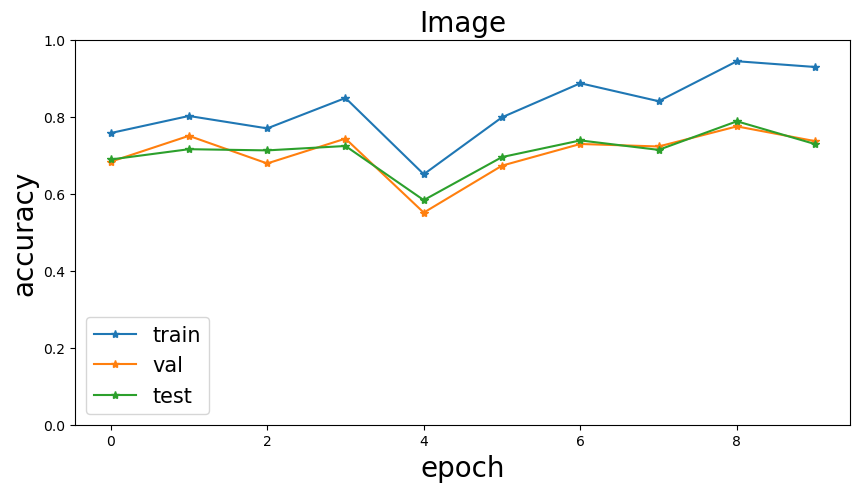

overall accuracy:
       train       val      test
0  0.757543  0.683054  0.688895
1  0.801954  0.750363  0.715635
2   0.76971  0.678665  0.712566
3  0.848665   0.74311  0.723969
4  0.650563   0.55096  0.583386
5  0.798562  0.672957  0.695235
6  0.886978  0.729208  0.738447
7    0.8403  0.722668  0.713903
8   0.94414  0.774887  0.788126
9  0.929167  0.736521  0.728867
test7aud


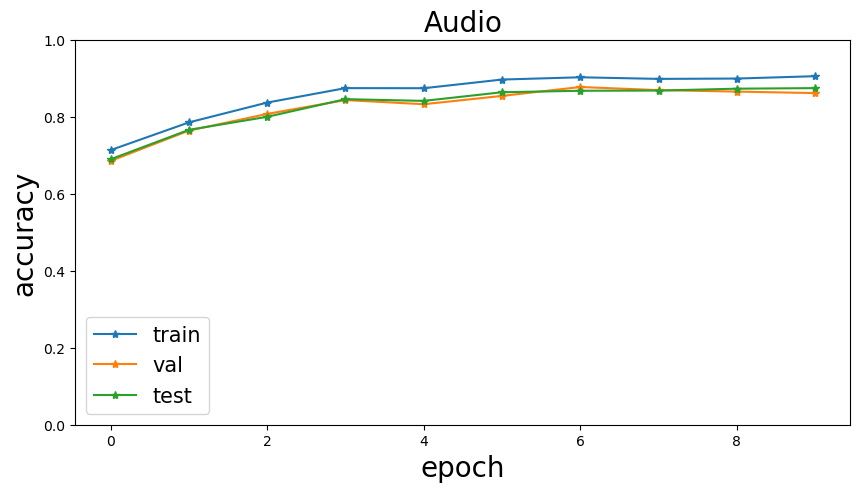

overall accuracy:
       train       val      test
0  0.713299  0.685188  0.689524
1  0.785248  0.763964  0.765918
2  0.836752  0.807302  0.799764
3  0.874289  0.843244  0.845612
4  0.874034  0.832479   0.84114
5  0.896551  0.854095   0.86358
6  0.902461  0.877165  0.867421
7  0.898257  0.869048  0.867965
8  0.899152  0.865288  0.872825
9  0.905258  0.861386  0.874309
test8mot


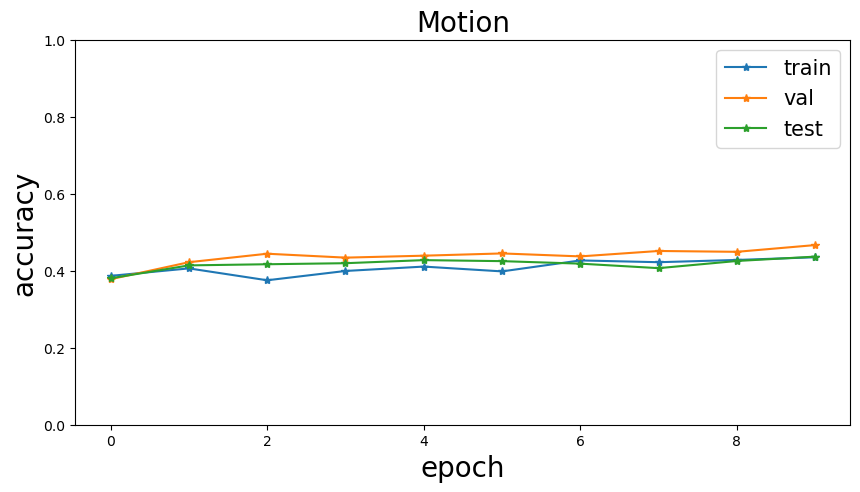

overall accuracy:
       train       val      test
0  0.386634  0.377932  0.380316
1  0.406037  0.422125  0.413859
2   0.37519  0.444152  0.416819
3   0.39937  0.434001  0.419534
4  0.410744  0.439045  0.427501
5  0.398251  0.444912  0.424879
6  0.426738  0.437203  0.418359
7  0.422114  0.451288  0.406656
8  0.427989  0.449106  0.425296
9  0.434976   0.46663  0.436624


In [85]:
for (test, nepoch, nbatch) in [#('test3', 10, 4), ]:
#                               ('test4', 40,1),
#                               ('test5',10,4),
                               ('test6img',10,4),
                              ('test7aud',10,4),
                              ('test8mot',10,4),
#                               ('test9',40,4)
]:
    print(test)
    df_acc = pd.DataFrame(columns=['train','val','test'])
    for epoch in range(0,nepoch):
        for batch in [nbatch-1]: #range(0,nbatch):
            res=pd.read_pickle(f'C:/home/Amy/Research/DogBehavior/src/py/{test}/result/epoch{epoch}batch{batch}.pk')
            for name in ['train','val','test']:
                if batch in [nbatch-1]:
                    #print(test, 'epoch=',epoch, batch, name, )
                    df_cm=res[name]
                    df_cm = df_cm.rename(columns={0:'sit', 1:'stand', 2:'walk', 3:'smell'}, index={0:'sit', 1:'stand', 2:'walk', 3:'smell'})
                    #print(df_cm);
                    #print('num samples:',df_cm.sum(axis=1).sum())
                    df_cm=df_cm.divide(df_cm.sum(axis=1), axis=0)
                    #print(df_cm)
                    df_acc.loc[epoch, name] = np.diag(df_cm.values).mean()
                
    
    df_acc.plot(figsize=(10,5), marker='*'); plt.legend(fontsize=15); plt.xlabel('epoch', fontsize=20); plt.ylabel('accuracy', fontsize=20);
    plt.ylim((0,1)); 
    if test=='test6img':
        plt.title('Image', fontsize=20)
    elif test=='test7aud':
        plt.title('Audio', fontsize=20)
    elif test=='test8mot':
        plt.title('Motion', fontsize=20)
    plt.show()
    print('overall accuracy:\n', df_acc)
            

##### accurracy by class 

test9


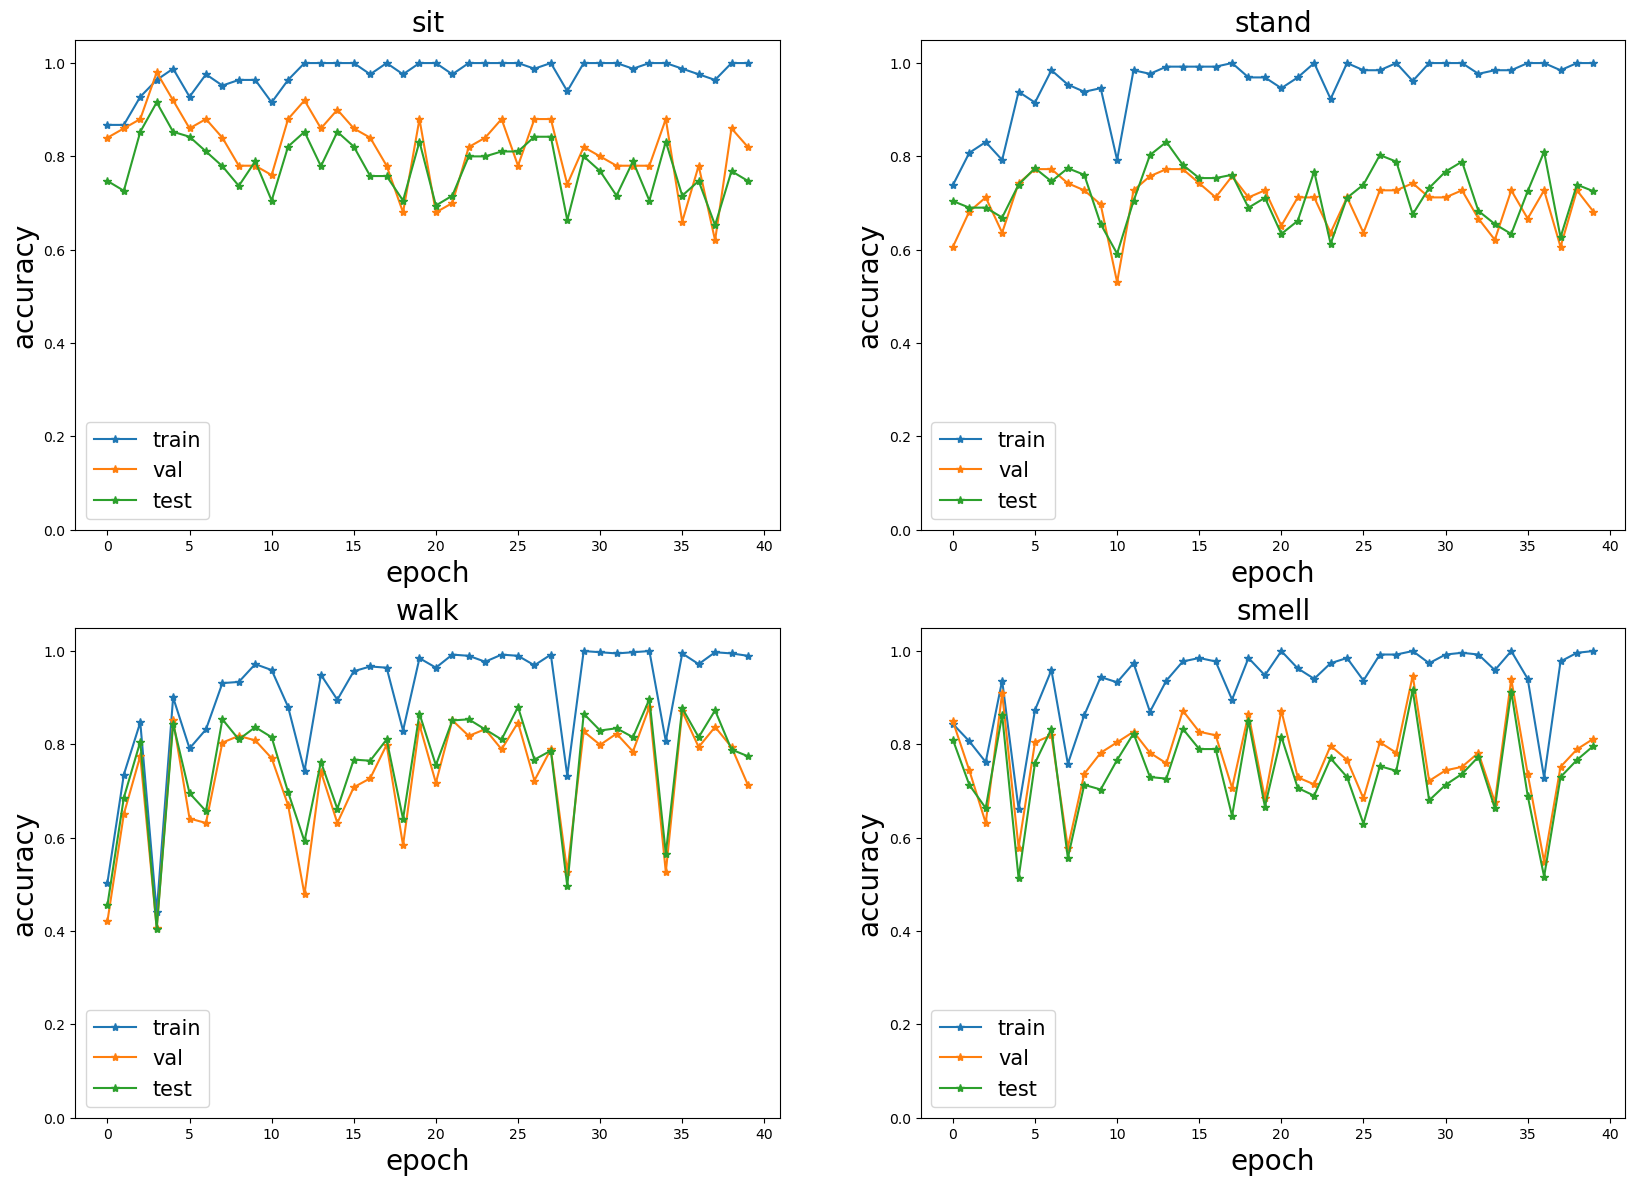

In [82]:
for (test, nepoch, nbatch) in [#('test3', 10, 4), 
#                               ('test4', 40,1),
#                               ('test5',10,4),
#                                ('test6img',10,4),
#                               ('test7aud',10,4),
#                               ('test8mot',10,4),
                              ('test9',40,4)]:
    print(test)
    dict_acc = {label: pd.DataFrame(columns=['train','val','test']) for label in ['sit','walk','stand','smell','avg']}
    for epoch in range(0,nepoch):
        for batch in range(0,nbatch):
            res=pd.read_pickle(f'C:/home/Amy/Research/DogBehavior/src/py/{test}/result/epoch{epoch}batch{batch}.pk')
            for name in ['train','val','test']:
                df_cm=res[name]
                #print('epoch',epoch,'batch',batch,name)
                #print(df_cm);
                #print(df_cm.divide(df_cm.sum(axis=1), axis=0))
                df_cm=df_cm.divide(df_cm.sum(axis=1), axis=0)
                #df_acc.loc[f'{epoch}{batch}', name] = np.diag(df_cm.values).mean()
                dict_acc['avg'].loc[epoch, name] = np.diag(df_cm.values).mean()
                for (label,k) in [('sit',0),('stand',1),('walk',2),('smell',3)]:
                    dict_acc[label].loc[epoch, name] = df_cm.loc[k,k]
    
    fig = plt.figure(figsize=(20,7*2))
#     ax=fig.add_subplot(3,2,1); dict_acc['avg'].plot(ax=ax, marker='*'); plt.title('average accuracy', fontsize=20)
#     plt.xlabel('epoch', fontsize=20); plt.ylabel('accuracy', fontsize=20); plt.ylim((0,1.05)); plt.legend(fontsize=15)
    ax=fig.add_subplot(2,2,1); dict_acc['sit'].plot(ax=ax,  marker='*'); plt.title('sit', fontsize=20)
    plt.xlabel('epoch', fontsize=20); plt.ylabel('accuracy', fontsize=20); plt.ylim((0,1.05)); plt.legend(fontsize=15)
    ax=fig.add_subplot(2,2,2); dict_acc['stand'].plot(ax=ax,  marker='*'); plt.title('stand', fontsize=20)
    plt.xlabel('epoch', fontsize=20); plt.ylabel('accuracy', fontsize=20); plt.ylim((0,1.05)); plt.legend(fontsize=15)
    ax=fig.add_subplot(2,2,3); dict_acc['walk'].plot(ax=ax,  marker='*'); plt.title('walk', fontsize=20)
    plt.xlabel('epoch', fontsize=20); plt.ylabel('accuracy', fontsize=20); plt.ylim((0,1.05)); plt.legend(fontsize=15)
    ax=fig.add_subplot(2,2,4); dict_acc['smell'].plot(ax=ax,  marker='*'); plt.title('smell', fontsize=20)
    plt.xlabel('epoch', fontsize=20); plt.ylabel('accuracy', fontsize=20); plt.ylim((0,1.05)); plt.legend(fontsize=15)
    plt.show()


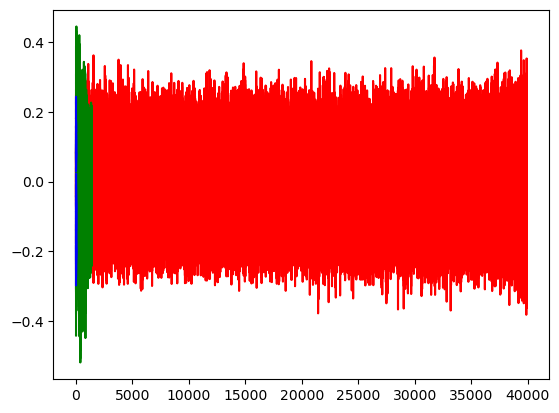

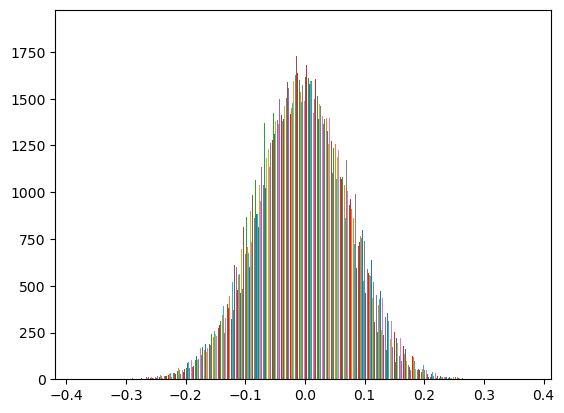

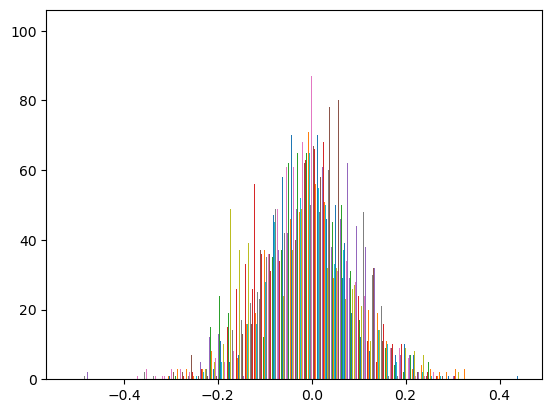

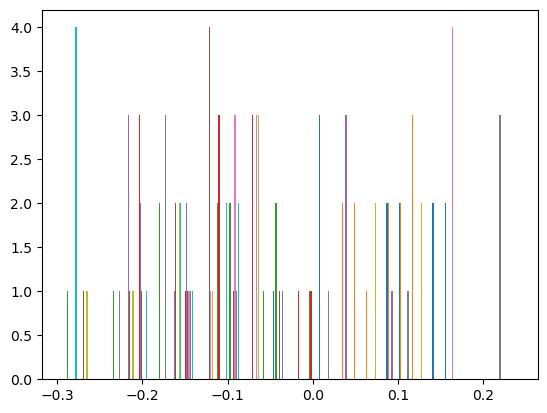

In [67]:
plt.plot(wt[0:39936],'r')
plt.plot(wt[39936:39936+1378],'g')
plt.plot(wt[39936+1378::],'b')
plt.show()

plt.hist(wt[0:39936],100); plt.show()
plt.hist(wt[39936:39936+1378],100); plt.show()
plt.hist(wt[39936+1378::],10)
plt.show()

##### visualize filter 

14
0 (7, 7, 3, 32)
1 (32,)
2 (32,)
3 (32,)
4 (32,)
5 (32,)
6 (1378,)
7 (1378,)
8 (1378,)
9 (1378,)
10 (41318, 30)
11 (30,)
12 (30, 4)
13 (4,)
-0.14299165 0.1780581


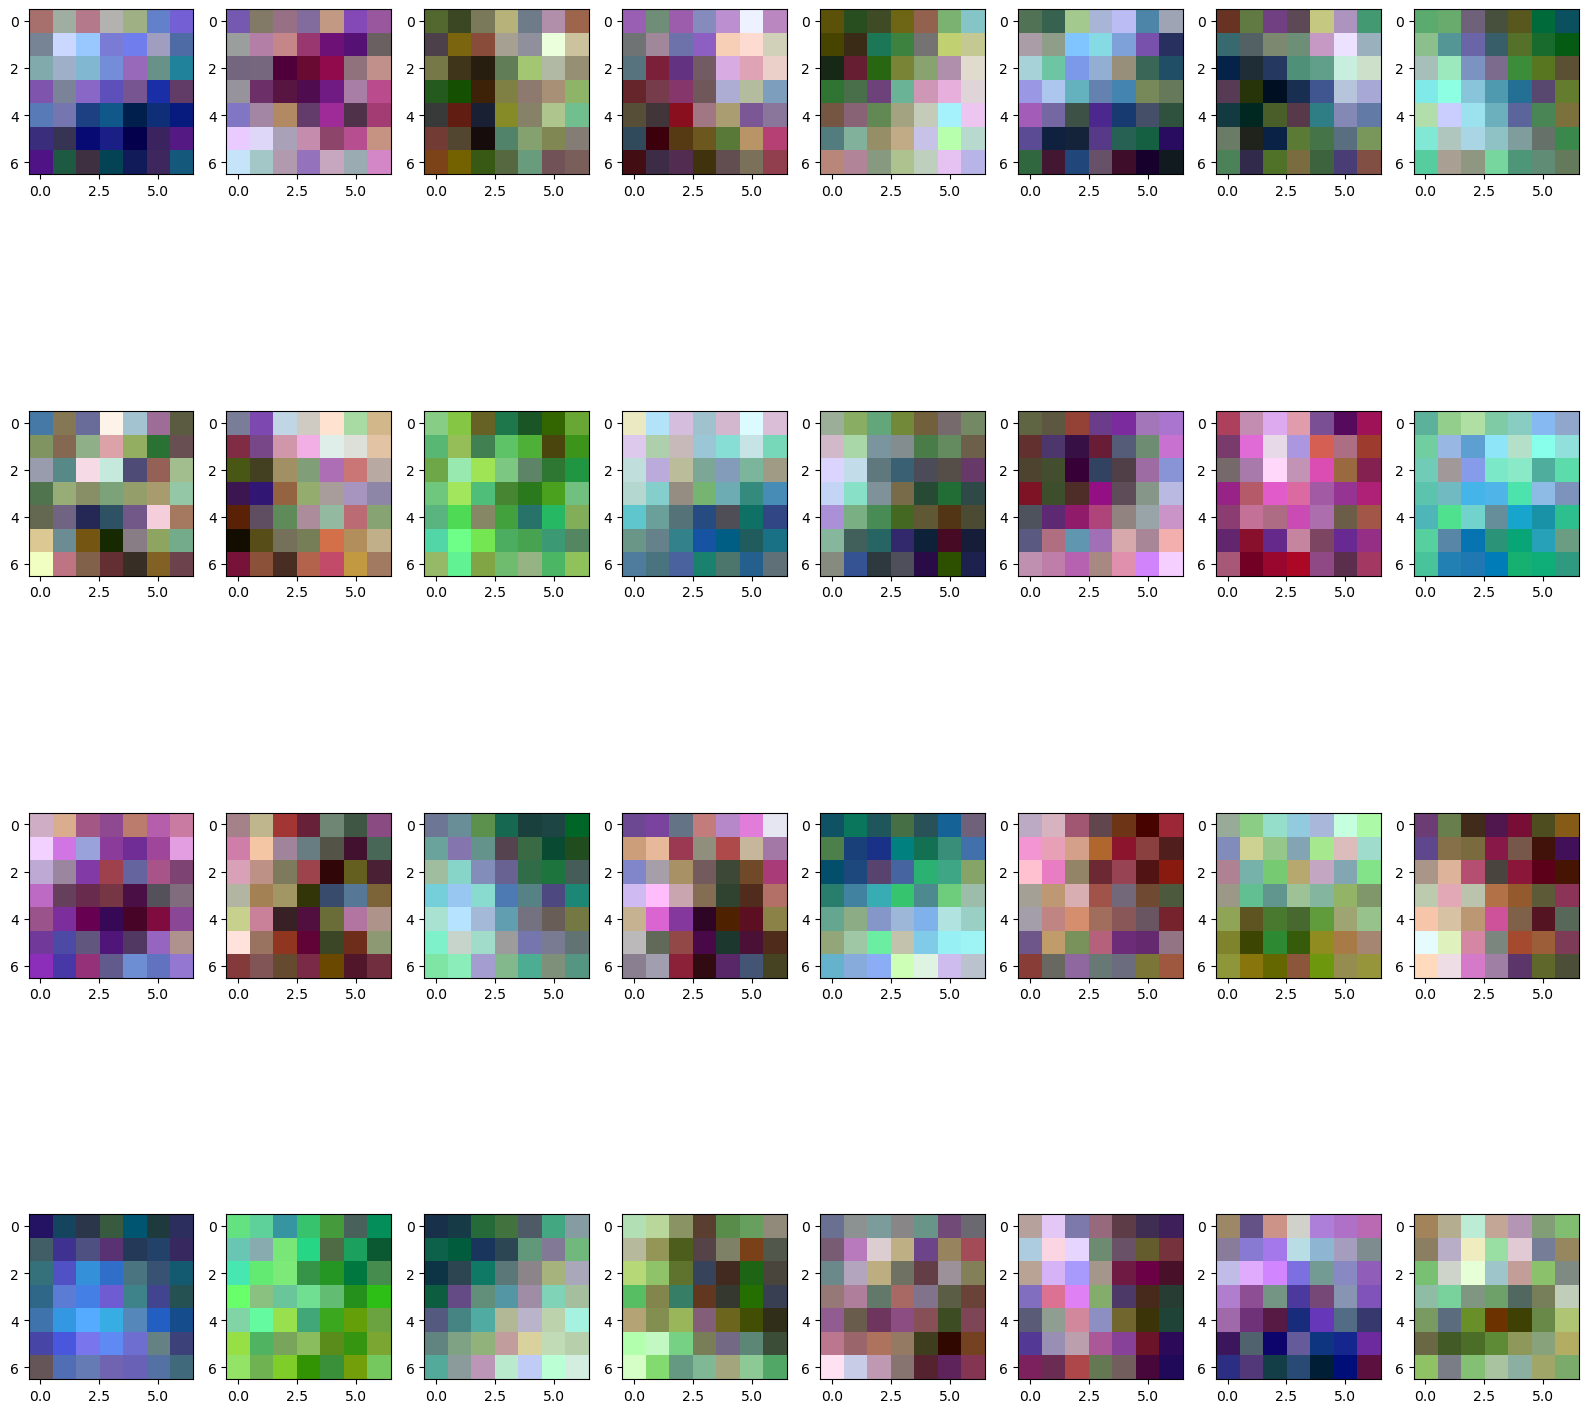

In [19]:
res=pd.read_pickle(f'C:/home/Amy/Research/DogBehavior/src/py/test5/result/epoch9batch0.pk')
wt=res['wt']#[10]
print(len(wt))
for k in range(len(wt)):
    print(k, wt[k].shape)
print(wt[0][:,:,:,0].min(), wt[0][:,:,:,0].max())

fig=plt.figure(figsize=(20,5*4))
for k in range(32):
    fil = (wt[0][:,:,:,k]-wt[0][:,:,:,k].min())/(wt[0][:,:,:,k].max()-wt[0][:,:,:,k].min())
    plt.subplot(4,8,k+1); plt.imshow( fil); 
plt.show()

##### visualize weights

14
0 (7, 7, 3, 32)
1 (32,)
2 (32,)
3 (32,)
4 (32,)
5 (32,)
6 (1378,)
7 (1378,)
8 (1378,)
9 (1378,)
10 (41318, 30)
11 (30,)
12 (30, 4)
13 (4,)


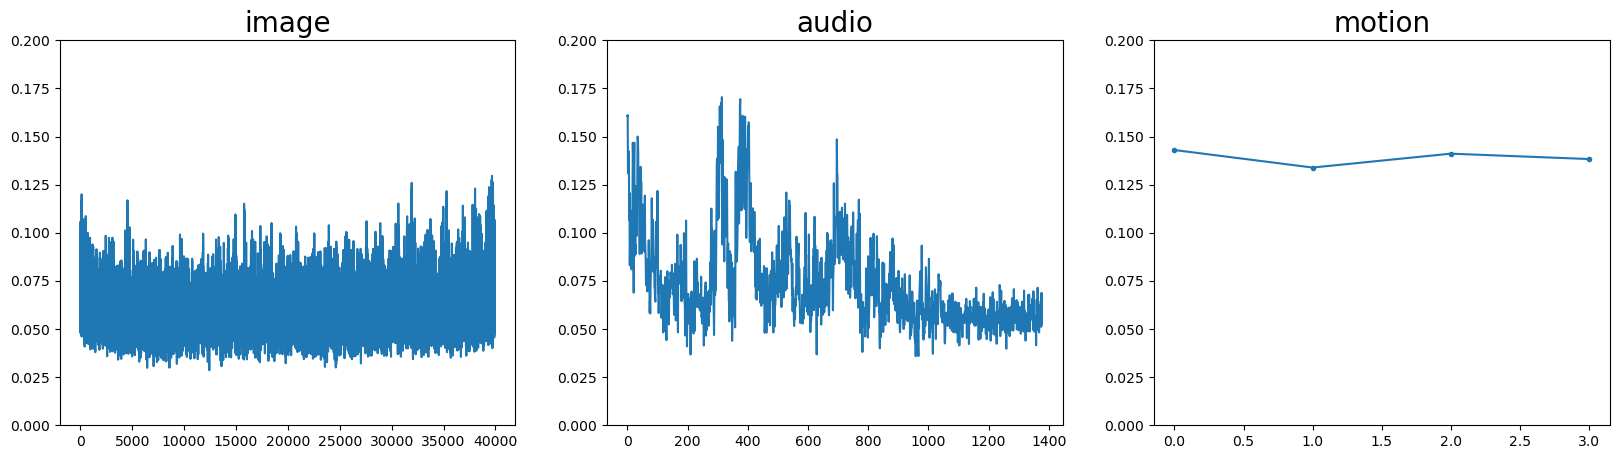

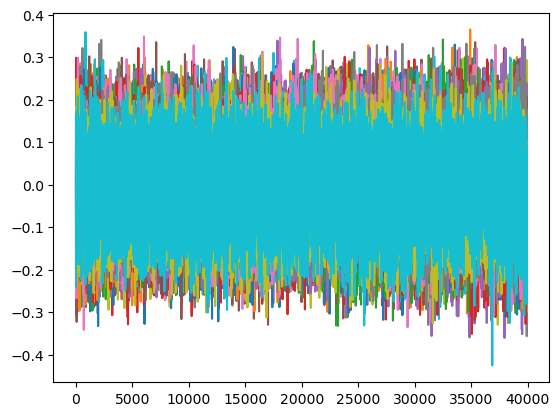

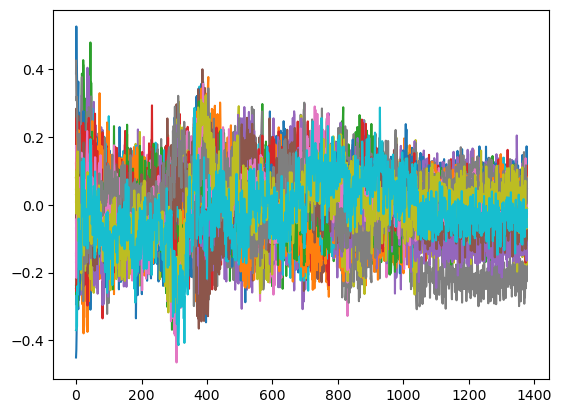

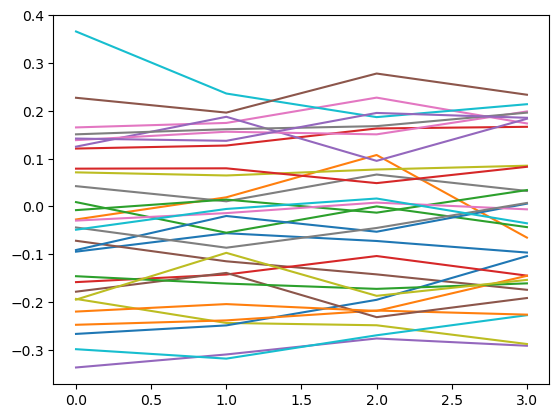

In [87]:
res=pd.read_pickle(f'C:/home/Amy/Research/DogBehavior/src/py/test5/result/epoch9batch0.pk')
wt=res['wt']#[10]
print(len(wt))
for k in range(len(wt)):
    print(k, wt[k].shape)
    
(k0_img,k1_img)=(0,26*48*32)
(k0_aud,k1_aud)=(26*48*32,26*48*32+1378)
(k0_mot,k1_mot)=(26*48*32+1378, 41318)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.plot(np.mean(np.abs(wt[10][k0_img:k1_img,:]), axis=1)); plt.title('image', fontsize=20); plt.ylim((0,0.2)); #plt.show()
plt.subplot(1,3,2); plt.plot(np.mean(np.abs(wt[10][k0_aud:k1_aud,:]), axis=1)); plt.title('audio', fontsize=20); plt.ylim((0,0.2)); #plt.show()
plt.subplot(1,3,3); plt.plot(np.mean(np.abs(wt[10][k0_mot:k1_mot,:]), axis=1), marker='.'); plt.title('motion', fontsize=20); plt.ylim((0,0.2)); plt.show()

plt.plot(wt[10][k0_img:k1_img,:]); plt.show()
plt.plot(wt[10][k0_aud:k1_aud,:]); plt.show()
plt.plot(wt[10][k0_mot:k1_mot,:]); plt.show()

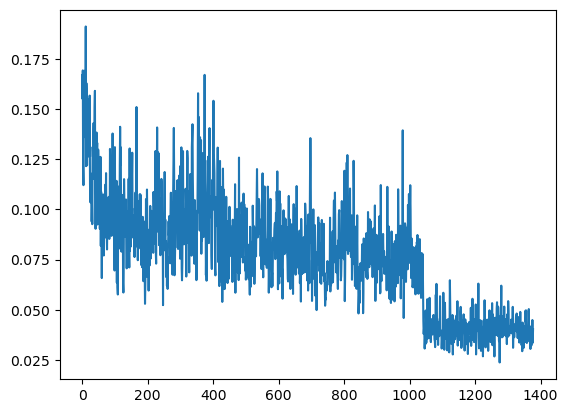

In [15]:
import numpy as np
plt.plot(np.abs(wt[4]).mean(axis=1)); plt.show()
